In [43]:
cd D:/DS7010/IEMOCAP_full_release/IEMOCAP_full_release

D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release


In [46]:
import sys
print(sys.version)

3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


In [12]:
import pandas as pd


In [13]:
data=pd.read_csv('iemocap_final.csv')
data

,_id,activation,valence,dominance,emotion,start_time,end_time,wav_file,session,sentences
0,625699ea1da7a5c1eaef6e63,2.5,2.5,2.5,neu,6.2901,8.2357,Ses01F_impro01_F000,1,Excuse me.
1,625699ea1da7a5c1eaef6e65,2.5,2.5,2.5,neu,10.0100,11.3925,Ses01F_impro01_F001,1,Yeah.
2,625699ea1da7a5c1eaef6e67,2.5,2.5,2.5,neu,14.8872,18.0175,Ses01F_impro01_F002,1,Is there a problem?
3,625699ea1da7a5c1eaef6e69,3.0,2.5,3.0,neu,19.2900,20.7875,Ses01F_impro01_F003,1,You did.
4,625699ea1da7a5c1eaef6e6a,3.0,2.5,2.5,neu,21.3257,24.7400,Ses01F_impro01_F004,1,You were standing at the beginning and you di...
...,...,...,...,...,...,...,...,...,...,...
10034,6256899b1da7a5c1eaef47c4,4.5,1.0,5.0,ang,236.5700,244.8300,Ses05M_script03_2_M041,5,"You are a vile tempered, wicked living, evil ..."
10035,6256899b1da7a5c1eaef47c6,4.5,1.0,4.5,ang,244.8400,246.5800,Ses05M_script03_2_M042,5,"Oh, you're not going like this."
10036,6256899b1da7a5c1eaef47c8,4.0,1.5,4.5,ang,246.5900,248.8300,Ses05M_script03_2_M043,5,"[GARBAGE] No, you're not."
10037,6256899b1da7a5c1eaef47ca,5.0,1.0,5.0,ang,255.8600,260.3300,Ses05M_script03_2_M044,5,oh! Marry you again? I wouldn't marry you aga...


# Testing the Audio files


In [6]:
iemodata_path='D:/DS7010/IEMOCAP_full_release/IEMOCAP_full_release'
iemodata_audio_path='/dialog/wav/'


Playing audio

In [12]:
!pip install pydub

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import os
import pydub
from pydub import AudioSegment
from pydub.playback import play
import time

In [35]:
def path_finding_for_audio(file_name,session_number):
    #folder_name=file_name
    wav_file=file_name + ".wav"
    number=session_number
    dataset_directory = 'D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release'
    sessions_to_play = ['session1','session2','session3','session4','session5']
    folder_name=extract_folder_name(file_name)
    audio_folder = os.path.join(dataset_directory,sessions_to_play[session_number-1],'sentences','wav',folder_name,wav_file)
    #check_exist(audio_folder)
    return audio_folder
    
def extract_folder_name(file_name):
    # Find the index of the underscore before the last character
    last_underscore_index = file_name.rfind('_')

    # Extract the substring from the beginning of the string up to the last underscore
    folder_name = file_name[:last_underscore_index]

    return folder_name

def check_exist(audio_folder):
    if os.path.exists(audio_folder):
        print('file exist')
    else:
        print('not exist')
        
path_finding_for_audio(data.wav_file[4],1)

'D:\\DS7010\\IEMOCAP_full_release\\IEMOCAP_full_release\\session1\\sentences\\wav\\Ses01F_impro01\\Ses01F_impro01_F004.wav'

In [9]:
path_finding_for_audio(data.wav_file[4],data.session[1])

file exist


'D:\\DS7010\\IEMOCAP_full_release\\IEMOCAP_full_release\\session1\\sentences\\wav\\Ses01F_impro01\\Ses01F_impro01_F004.wav'

In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Visualization

Spectrogram

file exist


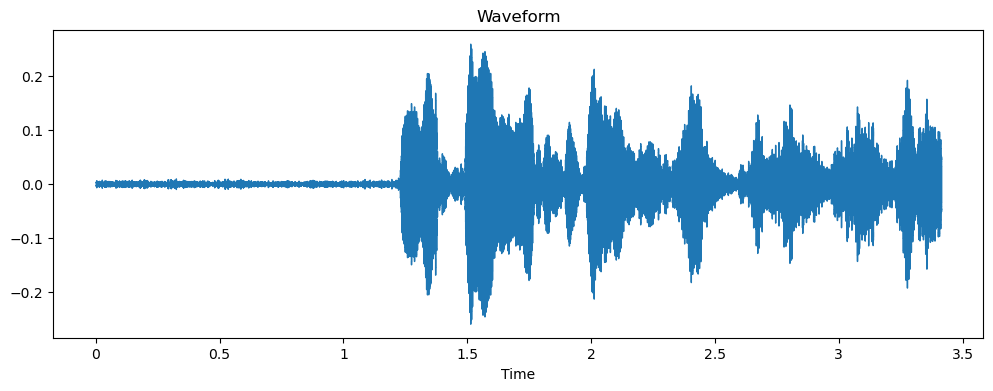

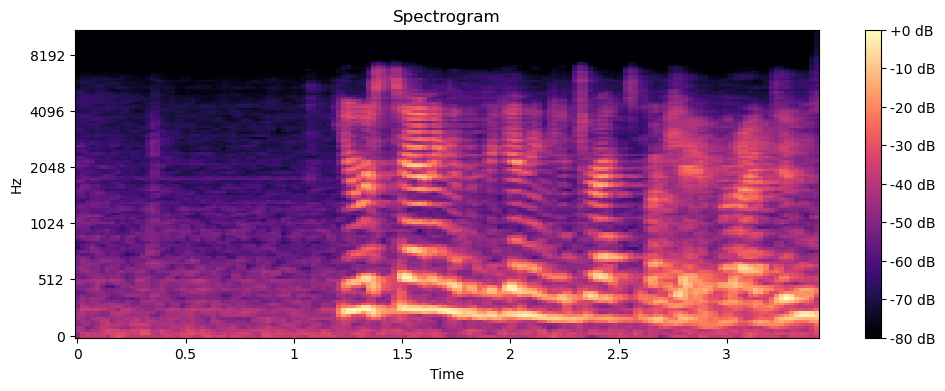

In [14]:
#audio_path = 'D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\dialog\wav\Ses01F_impro01.wav'  # Replace with the path to your audio file
audio_path=path_finding_for_audio(data.wav_file[4],data.session[1])
# Load the audio file
audio, sr = librosa.load(audio_path)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform')
plt.show()
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

Boxplot

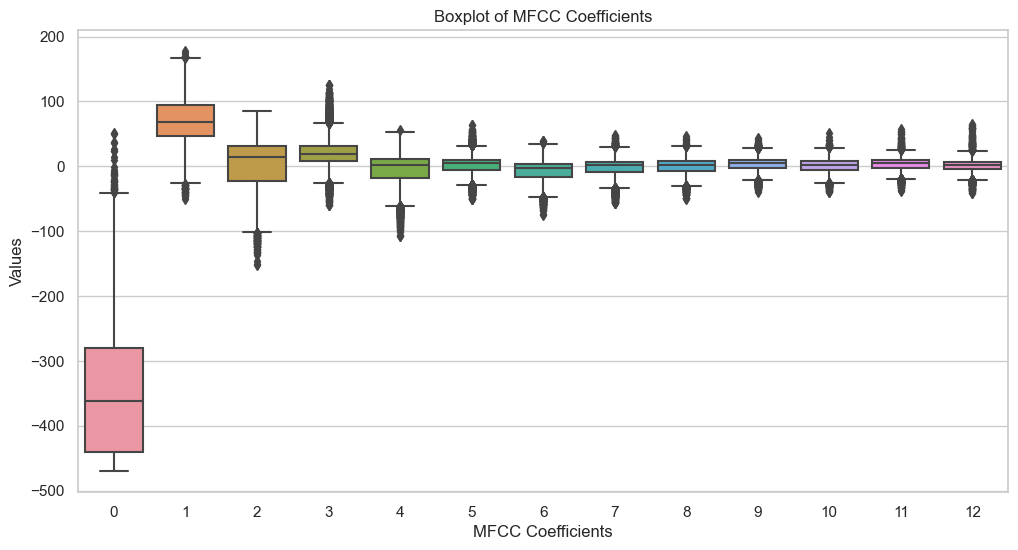

In [97]:
audio_data, sample_rate = librosa.load(audio_path, sr=None)
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)

# Transpose the MFCCs matrix to have features in columns
mfccs = mfccs.T

# Create a boxplot using seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.boxplot(data=mfccs)

# Set plot labels and title
ax.set(xlabel='MFCC Coefficients', ylabel='Values', title='Boxplot of MFCC Coefficients')

plt.show()

# MFCC

MFCC -- Audio Preprocessing

In [50]:
#MFCC finding
audio_file_path=audio_path
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
print(librosa_audio_data)
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)
mfccs

[0.00137073 0.00163217 0.00211101 ... 0.02591544 0.02203842 0.        ]
(40, 148)


array([[-474.39963   , -451.415     , -459.47308   , ..., -350.87204   ,
        -340.22842   , -333.39438   ],
       [ 113.48736   ,  122.2816    ,  120.233246  , ...,  158.94197   ,
         145.1904    ,  126.80296   ],
       [ -18.574009  ,  -16.433449  ,  -14.143351  , ...,  -26.967905  ,
         -14.702398  ,    7.207365  ],
       ...,
       [   1.4414237 ,    1.098625  ,    0.87536746, ...,    9.640001  ,
           4.778803  ,    0.7468922 ],
       [   6.2035427 ,    5.456863  ,    2.2767162 , ...,   13.193745  ,
           9.611972  ,    3.6450036 ],
       [   1.7152909 ,    0.95450854,   -1.1925938 , ...,    9.792963  ,
           9.621976  ,    5.0993    ]], dtype=float32)

In [38]:
import resampy

In [51]:
audio, sample_rate = librosa.load(audio_path, res_type='kaiser_fast') 
#sample_rate, audio = wavfile.read('D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01F_impro01\Ses01F_impro01_F004.wav')

#mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
#mfccs_features
mfccs_scaled_features = np.mean(mfccs.T,axis=0)
mfccs_scaled_features


ModuleNotFoundError: No module named 'resampy'

This error is lazily reported, having originally occured in
  File C:\Users\nishc\AppData\Roaming\Python\Python311\site-packages\librosa\core\audio.py, line 32, in <module>

----> resampy = lazy.load("resampy")

In [41]:
#function to generate MFCC

def features_extractor(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
metadata=data
for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file_name = path_finding_for_audio(row['wav_file'], row['session'])
    final_class_labels = row[["emotion", "activation", "valence", "dominance"]].tolist()
    datas = features_extractor(file_name)
    extracted_features.append([datas] + final_class_labels)

# Converting extracted_features to Pandas DataFrame
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'emotion', 'activation', 'valence', 'dominance'])
extracted_features_df.head()

100%|████████████████████████████████████████████████████████████████████████████| 10039/10039 [01:52<00:00, 89.37it/s]


,feature,emotion,activation,valence,dominance
0,"[-436.78757, 133.21057, -29.08213, 56.41462, -...",neu,2.5,2.5,2.5
1,"[-441.89963, 138.15549, -21.957924, 32.928356,...",neu,2.5,2.5,2.5
2,"[-455.49582, 150.60643, -22.854097, 37.412746,...",neu,2.5,2.5,2.5
3,"[-413.06967, 136.34132, -26.35888, 52.17189, -...",neu,3.0,2.5,3.0
4,"[-376.3959, 143.11813, -31.765738, 52.12766, 2...",neu,3.0,2.5,2.5


In [42]:
extracted_features_df


,feature,emotion,activation,valence,dominance
0,"[-436.78757, 133.21057, -29.08213, 56.41462, -...",neu,2.5,2.5,2.5
1,"[-441.89963, 138.15549, -21.957924, 32.928356,...",neu,2.5,2.5,2.5
2,"[-455.49582, 150.60643, -22.854097, 37.412746,...",neu,2.5,2.5,2.5
3,"[-413.06967, 136.34132, -26.35888, 52.17189, -...",neu,3.0,2.5,3.0
4,"[-376.3959, 143.11813, -31.765738, 52.12766, 2...",neu,3.0,2.5,2.5
...,...,...,...,...,...
10034,"[-268.41446, 103.60421, -28.587408, 40.46428, ...",ang,4.5,1.0,5.0
10035,"[-187.58122, 106.09629, -62.09598, 44.589054, ...",ang,4.5,1.0,4.5
10036,"[-145.28778, 117.33357, -81.15597, 24.832726, ...",ang,4.0,1.5,4.5
10037,"[-145.86224, 117.184456, -77.09353, 50.83178, ...",ang,5.0,1.0,5.0


In [17]:
from tqdm import tqdm
metadata=data
for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file_name = path_finding_for_audio(row['wav_file'], row['session'])
    # Do something with file_name, for example, print it
    print(f"File name for row {index_num}: {file_name}")

 11%|████████                                                                   | 1083/10039 [00:00<00:01, 5241.03it/s]

file exist
File name for row 0: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01F_impro01\Ses01F_impro01_F000.wav
file exist
File name for row 1: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01F_impro01\Ses01F_impro01_F001.wav
file exist
File name for row 2: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01F_impro01\Ses01F_impro01_F002.wav
file exist
File name for row 3: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01F_impro01\Ses01F_impro01_F003.wav
file exist
File name for row 4: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01F_impro01\Ses01F_impro01_F004.wav
file exist
File name for row 5: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01F_impro01\Ses01F_impro01_F005.wav
file exist
File name for row 6: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01F_impro01\Se

 21%|████████████████                                                           | 2147/10039 [00:00<00:01, 5158.81it/s]

file exist
File name for row 1083: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01M_impro05\Ses01M_impro05_F004.wav
file exist
File name for row 1084: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01M_impro05\Ses01M_impro05_F005.wav
file exist
File name for row 1085: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01M_impro05\Ses01M_impro05_F006.wav
file exist
File name for row 1086: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01M_impro05\Ses01M_impro05_F007.wav
file exist
File name for row 1087: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01M_impro05\Ses01M_impro05_F008.wav
file exist
File name for row 1088: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01M_impro05\Ses01M_impro05_F009.wav
file exist
File name for row 1089: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\

 27%|████████████████████▎                                                      | 2719/10039 [00:00<00:01, 5265.34it/s]

file exist
File name for row 2147: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02F_impro08\Ses02F_impro08_F001.wav
file exist
File name for row 2148: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02F_impro08\Ses02F_impro08_F002.wav
file exist
File name for row 2149: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02F_impro08\Ses02F_impro08_F003.wav
file exist
File name for row 2150: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02F_impro08\Ses02F_impro08_F004.wav
file exist
File name for row 2151: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02F_impro08\Ses02F_impro08_F005.wav
file exist
File name for row 2152: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02F_impro08\Ses02F_impro08_F006.wav
file exist
File name for row 2153: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\

 38%|████████████████████████████▍                                              | 3802/10039 [00:00<00:01, 5261.14it/s]

file exist
File name for row 3241: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02M_script01_2\Ses02M_script01_2_M014.wav
file exist
File name for row 3242: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02M_script01_2\Ses02M_script01_2_M015.wav
file exist
File name for row 3243: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02M_script01_2\Ses02M_script01_2_M016.wav
file exist
File name for row 3244: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02M_script01_2\Ses02M_script01_2_M017.wav
file exist
File name for row 3245: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02M_script01_2\Ses02M_script01_2_M018.wav
file exist
File name for row 3246: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session2\sentences\wav\Ses02M_script01_3\Ses02M_script01_3_F000.wav
file exist
File name for row 3247: D:\DS7010\IEMOCAP_full_release\IEMO

 49%|████████████████████████████████████▌                                      | 4900/10039 [00:00<00:00, 5254.10it/s]

file exist
File name for row 4281: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03F_script02_1\Ses03F_script02_1_F009.wav
file exist
File name for row 4282: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03F_script02_1\Ses03F_script02_1_F010.wav
file exist
File name for row 4283: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03F_script02_1\Ses03F_script02_1_F011.wav
file exist
File name for row 4284: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03F_script02_1\Ses03F_script02_1_F012.wav
file exist
File name for row 4285: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03F_script02_1\Ses03F_script02_1_F013.wav
file exist
File name for row 4286: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03F_script02_1\Ses03F_script02_1_F014.wav
file exist
File name for row 4287: D:\DS7010\IEMOCAP_full_release\IEMO

 59%|████████████████████████████████████████████▌                              | 5969/10039 [00:01<00:00, 5240.86it/s]

file exist
File name for row 5380: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03M_script01_3\Ses03M_script01_3_F025.wav
file exist
File name for row 5381: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03M_script01_3\Ses03M_script01_3_F026.wav
file exist
File name for row 5382: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03M_script01_3\Ses03M_script01_3_F027.wav
file exist
File name for row 5383: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03M_script01_3\Ses03M_script01_3_F028.wav
file exist
File name for row 5384: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03M_script01_3\Ses03M_script01_3_F029.wav
file exist
File name for row 5385: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session3\sentences\wav\Ses03M_script01_3\Ses03M_script01_3_F030.wav
file exist
File name for row 5386: D:\DS7010\IEMOCAP_full_release\IEMO

 70%|████████████████████████████████████████████████████▎                      | 7008/10039 [00:01<00:00, 5098.44it/s]

file exist
File name for row 6339: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04F_script01_1\Ses04F_script01_1_F003.wav
file exist
File name for row 6340: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04F_script01_1\Ses04F_script01_1_F004.wav
file exist
File name for row 6341: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04F_script01_1\Ses04F_script01_1_F005.wav
file exist
File name for row 6342: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04F_script01_1\Ses04F_script01_1_F006.wav
file exist
File name for row 6343: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04F_script01_1\Ses04F_script01_1_F007.wav
file exist
File name for row 6344: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04F_script01_1\Ses04F_script01_1_F008.wav
file exist
File name for row 6345: D:\DS7010\IEMOCAP_full_release\IEMO

 81%|████████████████████████████████████████████████████████████▍              | 8083/10039 [00:01<00:00, 5217.78it/s]

file exist
File name for row 7452: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04M_script01_2\Ses04M_script01_2_F002.wav
file exist
File name for row 7453: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04M_script01_2\Ses04M_script01_2_F003.wav
file exist
File name for row 7454: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04M_script01_2\Ses04M_script01_2_F004.wav
file exist
File name for row 7455: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04M_script01_2\Ses04M_script01_2_F005.wav
file exist
File name for row 7456: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04M_script01_2\Ses04M_script01_2_F006.wav
file exist
File name for row 7457: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session4\sentences\wav\Ses04M_script01_2\Ses04M_script01_2_F007.wav
file exist
File name for row 7458: D:\DS7010\IEMOCAP_full_release\IEMO

 92%|████████████████████████████████████████████████████████████████████▋      | 9201/10039 [00:01<00:00, 5366.99it/s]

file exist
File name for row 8502: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05F_impro08\Ses05F_impro08_M015.wav
file exist
File name for row 8503: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05F_impro08\Ses05F_impro08_M016.wav
file exist
File name for row 8504: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05F_impro08\Ses05F_impro08_M017.wav
file exist
File name for row 8505: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05F_impro08\Ses05F_impro08_M018.wav
file exist
File name for row 8506: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05F_impro08\Ses05F_impro08_M019.wav
file exist
File name for row 8507: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05F_impro08\Ses05F_impro08_M020.wav
file exist
File name for row 8508: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\

100%|██████████████████████████████████████████████████████████████████████████| 10039/10039 [00:01<00:00, 5252.33it/s]

file exist
File name for row 9639: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05M_script01_1b\Ses05M_script01_1b_M041.wav
file exist
File name for row 9640: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05M_script01_2\Ses05M_script01_2_F000.wav
file exist
File name for row 9641: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05M_script01_2\Ses05M_script01_2_F001.wav
file exist
File name for row 9642: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05M_script01_2\Ses05M_script01_2_F002.wav
file exist
File name for row 9643: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05M_script01_2\Ses05M_script01_2_F003.wav
file exist
File name for row 9644: D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session5\sentences\wav\Ses05M_script01_2\Ses05M_script01_2_F004.wav
file exist
File name for row 9645: D:\DS7010\IEMOCAP_full_release\IE

In [16]:
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd

In [17]:
ipd.Audio('D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01F_impro01\Ses01F_impro01_F004.wav')

In [128]:
sample_rate, audio = wavfile.read('D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\sentences\wav\Ses01F_impro01\Ses01F_impro01_F004.wav')
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))

Sample rate: 16000Hz
Audio duration: 3.41425s


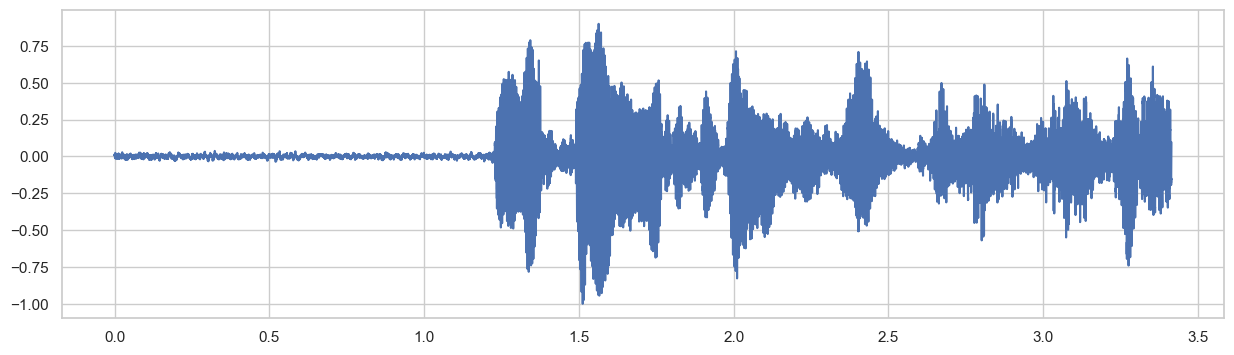

In [131]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio
audio
audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)